In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
plt.style.use('ggplot')

In [2]:
teba = pd.read_excel("teba.xlsx")
teba.drop("id", axis=1, inplace=True)

In [3]:
teba.head()

,idade,linhas,temp_cli,renda,fatura,temp_rsd,local,tvcabo,debaut,cancel,Y
0,51,4,26,5320.0,543,7.3,A,sim,nao,nao,0
1,36,2,16,5620.0,482,4.5,A,sim,nao,nao,0
2,35,1,15,4860.0,593,4.8,A,nao,nao,nao,0
3,40,1,22,6590.0,1184,6.2,C,sim,nao,nao,0
4,52,1,30,6370.0,634,2.2,A,nao,nao,nao,0


By analysing the info of teba dataframe, we can see that it seems like there is no missing data.<br/>
(Ao analisar as informacoes do dataframe, podemos ver que aparentemente nao ha valores ausentes)

In [4]:
teba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
idade       2000 non-null int64
linhas      2000 non-null int64
temp_cli    2000 non-null int64
renda       2000 non-null float64
fatura      2000 non-null int64
temp_rsd    2000 non-null float64
local       2000 non-null object
tvcabo      2000 non-null object
debaut      2000 non-null object
cancel      2000 non-null object
Y           2000 non-null int64
dtypes: float64(2), int64(5), object(4)
memory usage: 172.0+ KB


## Missing


Just to confirm, let's plot a heatmap of the missing data. If they exist, they will be shown as yellow bars<br/>
(Apenas para confirmar, vamos plotar um mapa de calor dos dados ausentes. Caso eles existam, irao aparecer em barras amarelas)

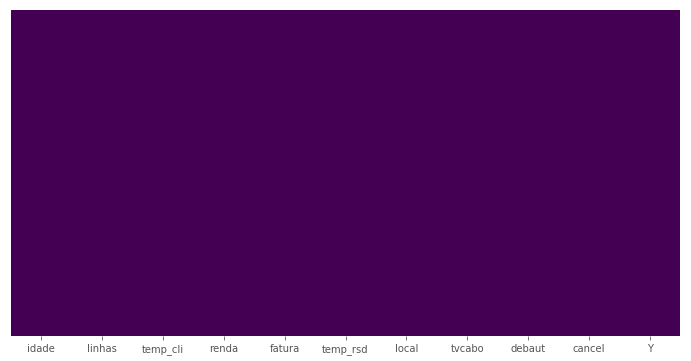

In [5]:
plt.figure(figsize=(12, 6))
sns.heatmap(teba.isnull(), yticklabels=False, cbar=False, cmap="viridis")

Like we expected, missing are missing in this database ;)<br/>
(Como esperado, os dados ausentes estao ausentes neta base de dados ;) )

## Debito Automatico


Let's look on how the age is distributed among the data. We will group the plot by the column "debaut"<br/>
(Vamos olhar como as idades sao distribuidadas entre os dados. Iremos agrupar a plotagem pela coluna "debaut")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F53A28DCC0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001F537FC3048>], dtype=object)

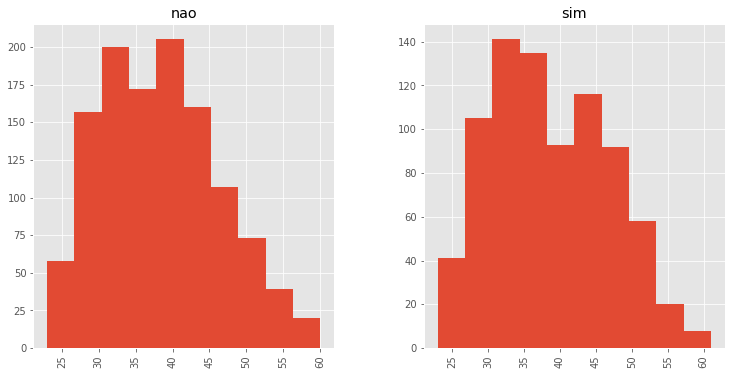

In [6]:
teba.hist(column="idade", figsize=(12,6), bins=10, by="debaut")

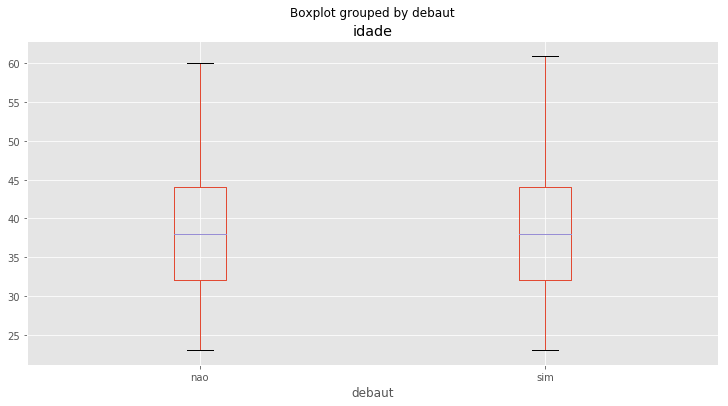

In [7]:
teba.boxplot(column="idade", by="debaut", figsize=(12,6))

Both those who pays in automatic debt or don't, the most frequent age is middle age (30-40 years)<br/>
(Ambas as pessoas que pagam ou nao em debito automatic estao na meia idade (30-40 anos) )

How many people are in each category?<br/>
(Quantas pessoas estao em cada categoria?)

C:\Users\ePricing\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


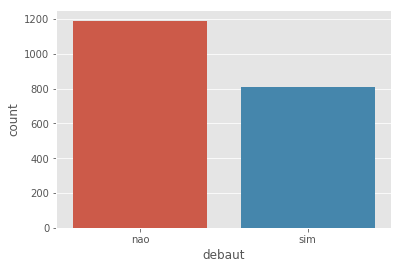

In [8]:
sns.countplot(x="debaut", data=teba)

1200 don't pay in automatic debt. 800 pay in this way<br/>
(1200 pessoas nao pagam no debito automatico. 800 pagam)

Let's look the amount of people who canceled the tv divided by those who pays in automatic debt

C:\Users\ePricing\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


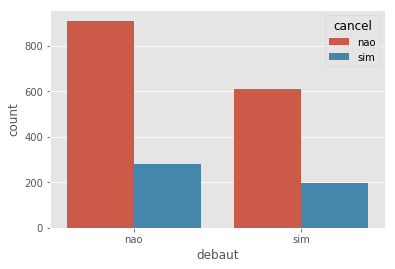

In [9]:
sns.countplot(x="debaut", hue="cancel", data=teba)

## TV a cabo

Now, let's how the column "idade" is distributed grouped by the column "tvcabo" <br/>
(Agora vamos ver como a coluna "idade" esta distribuida agrupada pela coluna "tvcabo")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F53A5E47F0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001F53A8616D8>], dtype=object)

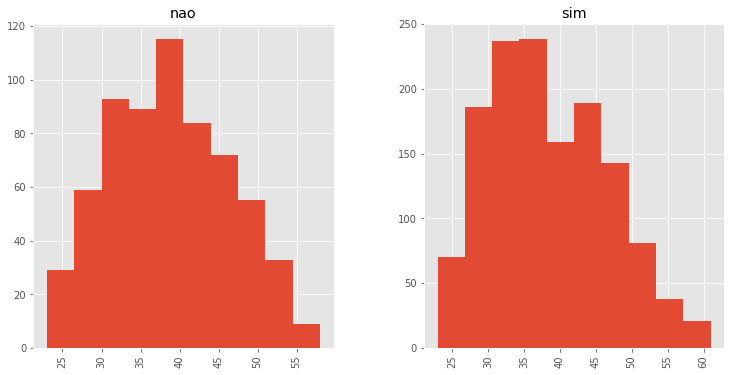

In [10]:
teba.hist(column="idade", figsize=(12,6), bins=10, by="tvcabo")

What is the mean age of those who has and don't have tv a cabo?

In [11]:
print("Possui tv a cabo: " + str(int(teba[teba["tvcabo"]=="sim"]["idade"].mean())))
print("NAO Possui tv a cabo: " + str(int(teba[teba["tvcabo"]=="nao"]["idade"].mean())))

Possui tv a cabo: 38
NAO Possui tv a cabo: 38


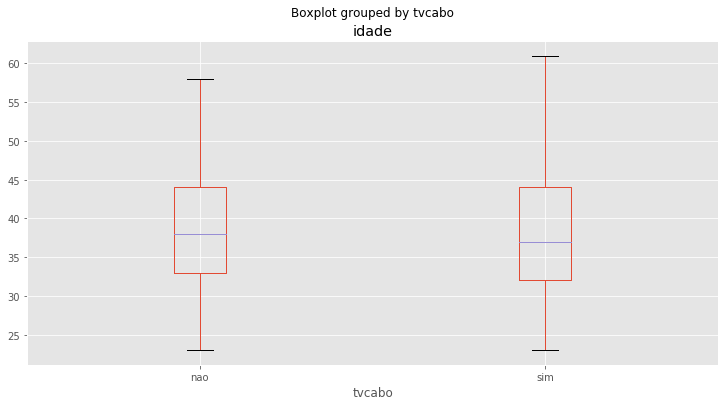

In [12]:
teba.boxplot(column="idade", by="tvcabo", figsize=(12,6))

(Analisando os boxplot podemos ver que as idades sao muito parecidas entre aqueles que possuem e os que nao possuem tv a cabo)

C:\Users\ePricing\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


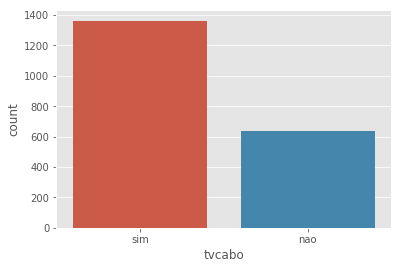

In [13]:
sns.countplot(x="tvcabo", data=teba)

C:\Users\ePricing\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


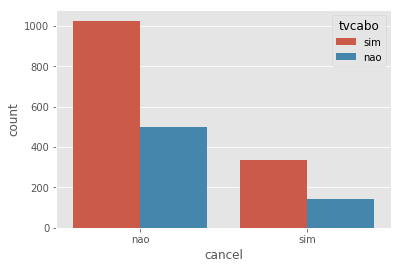

In [14]:
sns.countplot(x="cancel", data=teba, hue="tvcabo")

## Idade
(Como as idades sao distribuidas entre as pessoas que cancelaram e as que nao cancelaram)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F53ABD45C0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001F53AE2B7B8>], dtype=object)

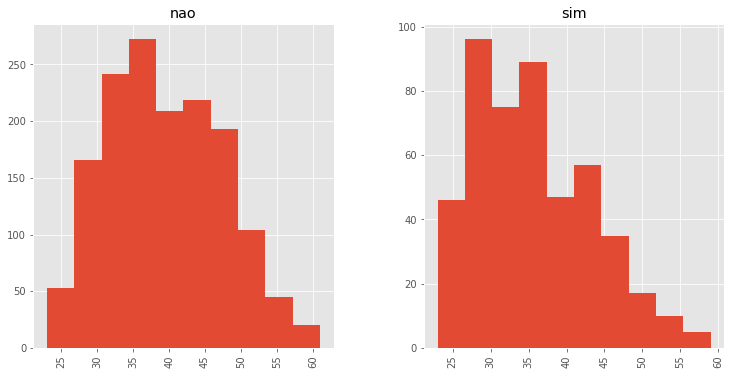

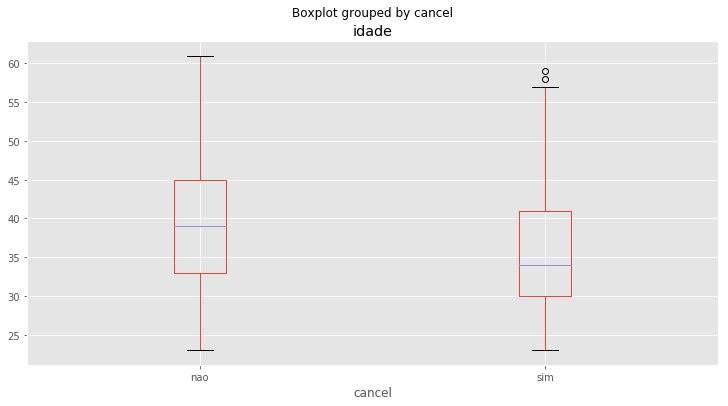

In [15]:
teba.hist(column="idade", figsize=(12,6), bins=10, by="cancel")
teba.boxplot(column="idade", by="cancel", figsize=(12,6))

(Pessoas que cancelaram costumam ser mais novas do que as que nao cancelaram. Entre 25 e 30 anos sao as que mais cancelaram)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F53ADC7E48>]], dtype=object)

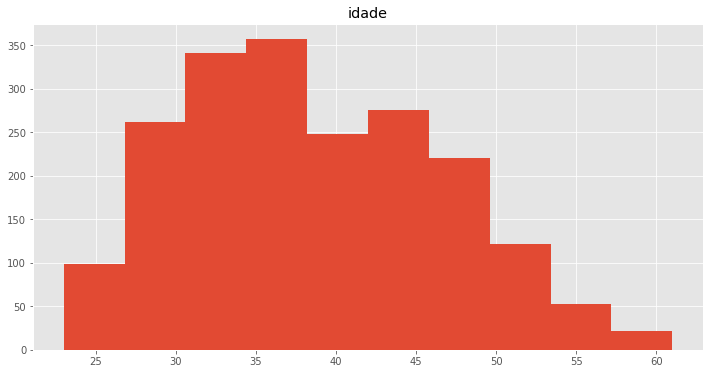

In [16]:
teba.hist(column="idade", figsize=(12,6), bins=10)

In [17]:
print("Media de idade para a classe cancel")
print("Cancelou: " + str(int(teba[teba["cancel"]=="sim"]["idade"].mean())))
print("NAO Cancelou: " + str(int(teba[teba["cancel"]=="nao"]["idade"].mean())))

Media de idade para a classe cancel
Cancelou: 35
NAO Cancelou: 39


In [18]:
pd.DataFrame(data={"Cancelou":[int(teba[teba["cancel"]=="sim"]["idade"].mean()), 
                            int(teba[teba["cancel"]=="sim"]["idade"].min()),
                            int(teba[teba["cancel"]=="sim"]["idade"].max())],
             
            "Nao Cancelou":[int(teba[teba["cancel"]=="nao"]["idade"].mean()),
                           int(teba[teba["cancel"]=="nao"]["idade"].min()),
                           int(teba[teba["cancel"]=="nao"]["idade"].max())]},
            index=["media", "min", "max"])

,Cancelou,Nao Cancelou
media,35,39
min,23,23
max,59,61


## Renda

(Vamos olhar para a renda. Vamos ver qual a renda media, minima e maxima dos que cancelaram e os que nao cancelaram)

In [19]:
pd.DataFrame(data={"Cancelou":[int(teba[teba["cancel"]=="sim"]["renda"].mean()), 
                            int(teba[teba["cancel"]=="sim"]["renda"].min()),
                            int(teba[teba["cancel"]=="sim"]["renda"].max())],
             
            "Nao Cancelou":[int(teba[teba["cancel"]=="nao"]["renda"].mean()),
                           int(teba[teba["cancel"]=="nao"]["renda"].min()),
                           int(teba[teba["cancel"]=="nao"]["renda"].max())]},
            index=["media", "min", "max"])

,Cancelou,Nao Cancelou
media,7126,7833
min,4210,4230
max,30030,42130


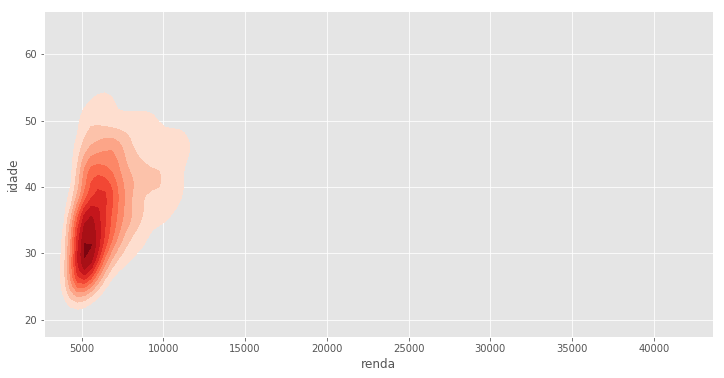

In [20]:
plt.figure(figsize=(12,6))
ax = sns.kdeplot(teba.renda, teba.idade,
                 cmap="Reds", shade=True, shade_lowest=False)

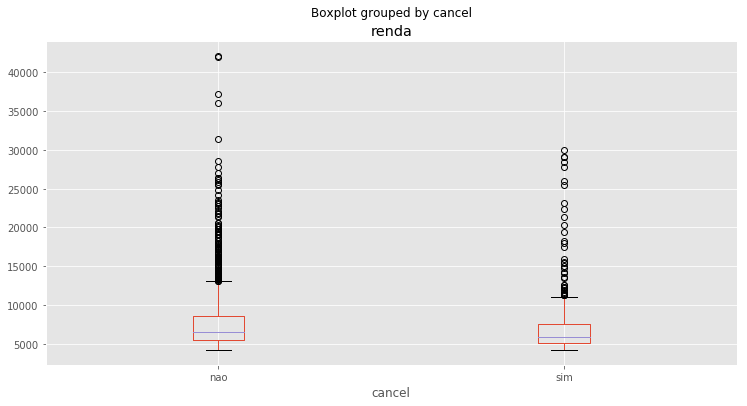

In [21]:
teba.boxplot(column="renda", by="cancel", figsize=(12,6))

In [22]:
teba[teba["cancel"]=="nao"]["renda"].describe()

count     1523.000000
mean      7833.118844
std       3976.018790
min       4230.000000
25%       5510.000000
50%       6570.000000
75%       8560.000000
max      42130.000000
Name: renda, dtype: float64

In [23]:
teba[teba["cancel"]=="sim"]["renda"].describe()

count      477.000000
mean      7126.184486
std       3743.716095
min       4210.000000
25%       5160.000000
50%       5840.000000
75%       7570.000000
max      30030.000000
Name: renda, dtype: float64

In [24]:
greatest = teba["renda"].max() 
def normalizeColumn(a):
    return a/greatest

renda_normalizada = teba["renda"].apply(normalizeColumn)

(Como estao as rendas dos clientes? Iremos discretizar as rendas por classe social)

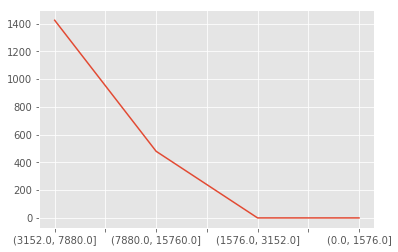

In [25]:
# teba["renda"] = renda_normalizada
bins = [0, 1576.00, 3152.00, 7880.00, 15760.00]
cats = pd.cut(teba["renda"], bins)
pd.value_counts(cats).plot()

(Podemos ver que a maioria dos clientes (mais de 1400 clientes), possuem renda entre R\$ 3152,00 e R\$ 7880,00)

In [26]:
def discretizaRenda(x):
    if x >= 0 and x <= 1576.00:
        return "E"
    if x > 1576.00 and x <= 3152.00:
        return "D"
    if x > 3152.00 and x <= 7880.00:
        return "C"
    if x > 7880.00 and x <= 15760.00:
        return "B"
    if x > 15760.00:
        return "A"

classe_social = teba["renda"].apply(discretizaRenda)
teba["classe_social"] = classe_social

(E como estao os cancelamentos por classe social? Qual classe social cancela mais?)

C:\Users\ePricing\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


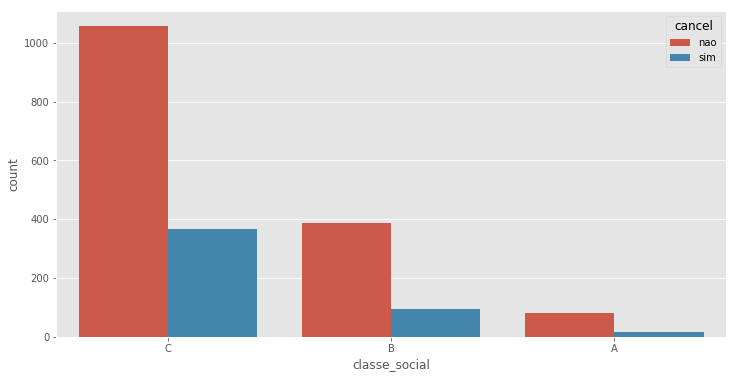

In [27]:
plt.figure(figsize=(12, 6))
sns.countplot(x="classe_social", data=teba, hue="cancel")


(Podemos ver que a classe C eh a que mais cancelou planos. Mais precisamento 1424 cancelamentos contra 96 da classe A)

In [28]:
teba[teba["classe_social"]=="C"]["renda"].count()
teba[teba["classe_social"]=="A"]["renda"].count()

1424

96

C:\Users\ePricing\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


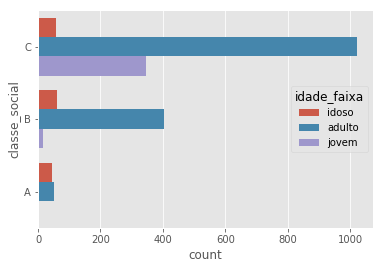

In [29]:
def discretizaIdade(x):
    if x <= 30:
        return "jovem"
    if x > 30 and x <= 50:
        return "adulto"
    if x > 50:
        return "idoso"

idade_faixa = teba["idade"].apply(discretizaIdade)
teba["idade_faixa"] = idade_faixa
sns.countplot(y="classe_social", data=teba, hue="idade_faixa")

## Data preparation
(Agora iremos preparar os dados, transforma-los para poder aplicar algoritmos de machine learning)
<br/>Vamos iniciar transformando a variavel idade. Iremos discretiza-la

In [30]:
teba.head()

,idade,linhas,temp_cli,renda,fatura,temp_rsd,local,tvcabo,debaut,cancel,Y,classe_social,idade_faixa
0,51,4,26,5320.0,543,7.3,A,sim,nao,nao,0,C,idoso
1,36,2,16,5620.0,482,4.5,A,sim,nao,nao,0,C,adulto
2,35,1,15,4860.0,593,4.8,A,nao,nao,nao,0,C,adulto
3,40,1,22,6590.0,1184,6.2,C,sim,nao,nao,0,C,adulto
4,52,1,30,6370.0,634,2.2,A,nao,nao,nao,0,C,idoso


In [31]:
# from statsmodels.graphics.mosaicplot import mosaic
# plt.figure(figsize=(12,6))
# mosaic(teba, ["idade_faixa", "classe_social"],)

In [32]:
# mosaic(teba, ['idade', 'classe_social'])

C:\Users\ePricing\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


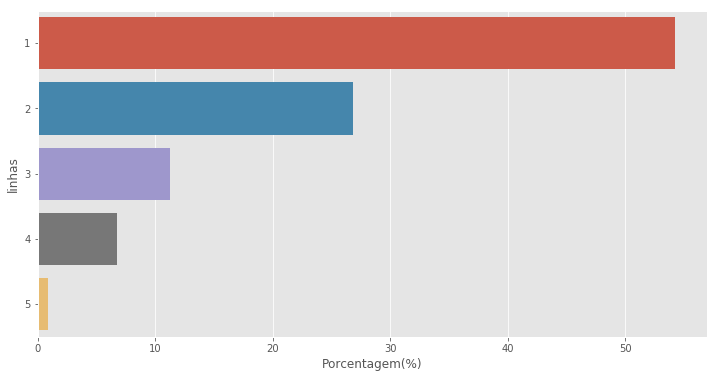

In [33]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x="linhas", data=teba, y="linhas",  estimator=lambda x: len(x) / len(teba) * 100,orient="h")
ax.set(xlabel="Porcentagem(%)")

## Correlation

(Vamos verificar como está a correlação entre as variáveis)

In [34]:
teba.corr()

,idade,linhas,temp_cli,renda,fatura,temp_rsd,Y
idade,1.000000,0.028147,0.540477,0.499257,0.242335,0.019522,-0.195531
linhas,0.028147,1.000000,-0.166182,0.210515,0.122893,-0.001804,0.124831
temp_cli,0.540477,-0.166182,1.000000,0.646815,0.343246,0.003268,-0.270114
renda,0.499257,0.210515,0.646815,1.000000,0.531427,0.008555,-0.076630
fatura,0.242335,0.122893,0.343246,0.531427,1.000000,0.016325,0.252565
temp_rsd,0.019522,-0.001804,0.003268,0.008555,0.016325,1.000000,0.022739
Y,-0.195531,0.124831,-0.270114,-0.076630,0.252565,0.022739,1.000000


In [36]:
dummy = pd.get_dummies(teba["local"], prefix="local", drop_first=True)
teba = pd.concat([teba, 
            dummy, 
            pd.get_dummies(teba["idade_faixa"], prefix="idade_faixa", drop_first=True),
            pd.get_dummies(teba["tvcabo"], prefix="tvcabo", drop_first=True),
            pd.get_dummies(teba["debaut"], prefix="debaut", drop_first=True),
            pd.get_dummies(teba["classe_social"], prefix="classe_social", drop_first=True)     ], axis=1)
teba.head()

,idade,linhas,temp_cli,renda,fatura,temp_rsd,local,tvcabo,debaut,cancel,...,idade_faixa,local_B,local_C,local_D,idade_faixa_idoso,idade_faixa_jovem,tvcabo_sim,debaut_sim,classe_social_B,classe_social_C
0,51,4,26,5320.0,543,7.3,A,sim,nao,nao,...,idoso,0,0,0,1,0,1,0,0,1
1,36,2,16,5620.0,482,4.5,A,sim,nao,nao,...,adulto,0,0,0,0,0,1,0,0,1
2,35,1,15,4860.0,593,4.8,A,nao,nao,nao,...,adulto,0,0,0,0,0,0,0,0,1
3,40,1,22,6590.0,1184,6.2,C,sim,nao,nao,...,adulto,0,1,0,0,0,1,0,0,1
4,52,1,30,6370.0,634,2.2,A,nao,nao,nao,...,idoso,0,0,0,1,0,0,0,0,1


## Machine Learning

(Agora iremos comecar a montar, treinar e testar os algoritmos de aprendizado de maquina)

### Decision Tree

(O primeiro algoritmo a ser implementado sera uma arvore de decisao )

In [37]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [38]:
X = teba.drop(["local", "tvcabo", "debaut", "cancel", "Y", "classe_social", "idade_faixa"], axis=1)
Y = teba["Y"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [39]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)

In [40]:
predict = clf.predict(X_test)

In [41]:
print("Accuracy: "+ str(metrics.accuracy_score(Y_test, predict)))
print("Precision: " + str(metrics.precision_score(Y_test, predict)))
print("Recall: " + str(metrics.recall_score(Y_test, predict)))
print("F1: " + str(metrics.f1_score(Y_test, predict)))
print("ROC: " + str(metrics.roc_auc_score(Y_test, predict)))


Accuracy: 0.745454545455
Precision: 0.510067114094
Recall: 0.444444444444
F1: 0.475
ROC: 0.647580095433


In [42]:
# Compute ROC curve and ROC area for each class
n_classes =  Y.shape[0]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], t = metrics.roc_curve(Y_test, predict)
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = metrics.roc_curve(Y_test.ravel(), predict.ravel())
roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])
